In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import time
import visa

In [3]:
rm = visa.ResourceManager()
print(rm.list_resources())

(u'USB0::0x0957::0x0618::MY52210065::INSTR', u'ASRL1::INSTR')


In [4]:
multimeter = rm.open_resource('USB0::0x0957::0x0618::MY52210065::INSTR')
print(multimeter.query('*IDN?'))

Agilent Technologies,34405A,MY52210065,1.47-3.13



In [6]:
multimeter.write("TRIG:SOUR IMM")

(15L, <StatusCode.success: 0>)

In [8]:
print(multimeter.query('TRIG:SOUR?'))

IMM



In [13]:
multimeter.write("CONF:VOLT:DC:RANG 1")

(21L, <StatusCode.success: 0>)

In [15]:
print(multimeter.query("READ?"))

+1.36970000E-01 



In [66]:
4096/rate / 60

7.7310467165353121

In [68]:
2**12

4096

In [33]:
data = []
t = []
t0 = time.time()
for k in range(4096):
    t.append(time.time())
    data.append(multimeter.query_ascii_values("READ?")[0])

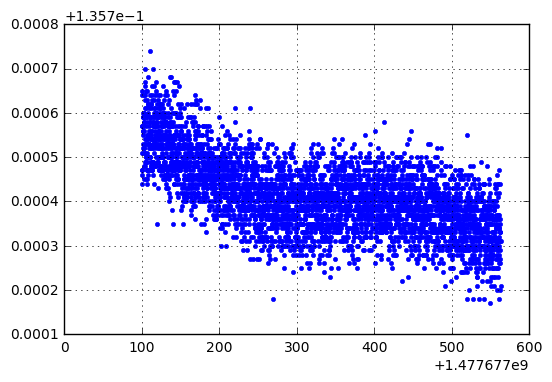

In [35]:
plot(t, data, '.')
grid()
#ylim([0.136, 0.138])

In [36]:
period = np.mean(np.diff(t))
rate = 1./period

In [37]:
rate

8.8424717923182499

In [38]:
period

0.11309055018628765

In [39]:
freqs = np.fft.rfftfreq(n=1024, d=period)
datafft = np.fft.rfft(data, n=1024)
psd = (period/len(t)) * np.abs(datafft)

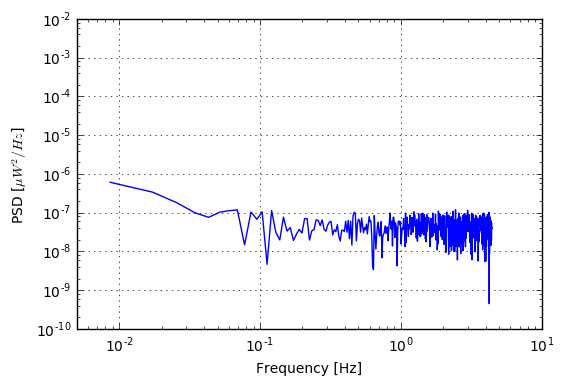

In [40]:
loglog(freqs, psd)
#ylim([1e-7, 1e-5])
xlim([5e-3, 10])
xlabel('Frequency [Hz]')
ylabel('PSD [$\mu W^2 / Hz$]')
grid()

In [24]:
freqs = np.fft.rfftfreq(n=1024/32, d=period)
datafft = np.fft.rfft(data, n=1024/32)
psd = (period*32/len(t)) * np.abs(datafft)

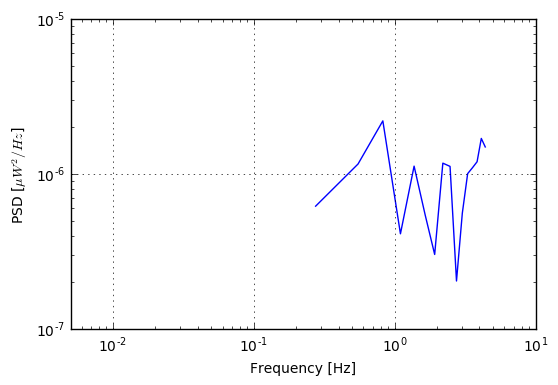

In [25]:
loglog(freqs, psd)
ylim([1e-7, 1e-5])
xlim([5e-3, 10])
xlabel('Frequency [Hz]')
ylabel('PSD [$\mu W^2 / Hz$]')
grid()

In [26]:
nk = 32
nl = len(t)/nk
freqs = np.fft.rfftfreq(n=nl, d=period)
psdavg = np.zeros(nl/2 + 1)
for k in range(nk-1):
    datafft = np.fft.rfft(data[k*nl:(k+1)*nl], n=nl)
    psdavg += (period/nl) * np.abs(datafft)
psdavg /= nk

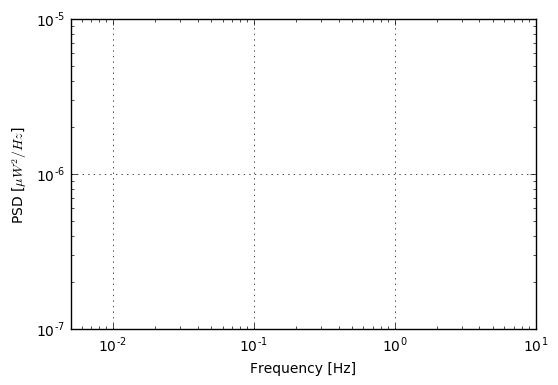

In [27]:
loglog(freqs, psdavg)
loglog(freqs, np.mean(psdavg[1:])*np.ones(len(psdavg)))
ylim([1e-7, 1e-5])
xlim([5e-3, 10])
xlabel('Frequency [Hz]')
ylabel('PSD [$\mu W^2 / Hz$]')
grid()

In [63]:
np.mean(psdavg[1:])

9.933762484016659e-07